# Приоритизация гипотез и проведение А/В-теста

## Приоритизация гипотез

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

In [2]:
data = pd.read_csv('...')
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Пропусков нет, все столбцы имеют правильный тип данных.

### Применение фреймворка ICE для приоритизации гипотез

In [4]:
data['ICE'] = round(data['Impact'] * data['Confidence'] / data['Efforts'], 1)
data.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


<div style="border:solid orange 3px; padding: 20px">В результате применения фреймворка ICE лидируют гипотезы с индексом 8,0 и 7. На первом месте гипотеза о том, что увеличению выручки будет способствовать акция, дающая скидку на товар в день рождения.

### Применение фреймворка RICE для приоритизации гипотез

In [5]:
data['RICE'] = data['Reach'] * data['Impact'] * data['Confidence'] / data['Efforts']
data.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


<div style="border:solid orange 3px; padding: 20px">В результате применения фреймворка RICE лидируют гипотезы с индексом 7,2,0 и 6. На первом месте гипотеза о том, что увеличению выручки будет способствовать добавление формы подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, при чем эта гипотеза существенно опережает все остальные. 

### Как изменилась приоритизация гипотез при применении RICE вместо ICE

<div style="border:solid orange 3px; padding: 20px">Приоритизация гипотез при применении RICE изменила порядок приоритета. По сравнению с ICE приоритеты поменялись из-за параметра Reach, определяющего охват пользователей. У 7й стратегии, являющейся лидером по RICE, этот параметр максимальный, а у лидера по ICE (стратегия 8) - минимальный, в связи с чем эта гипотеза скатилась в середину рейтинга.

## Анализ A/B-теста

Изучим таблицы и проведем предобработку данных в случае необходимости

In [6]:
orders = pd.read_csv('...')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Пропуски отсутствуют. Необходимо привести столбец **`date`** к правильному типу данных.

In [8]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [9]:
#проверим на наличие дубликатов
orders.duplicated().sum()

0

In [10]:
visitors = pd.read_csv('...')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Пропуски отсутствуют. Необходимо привести столбец **`date`** к правильному типу данных.

In [12]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [13]:
#проверим на наличие дубликатов
visitors.duplicated().sum()

0

In [14]:
# проверим на наличие пользователей, которые попали в обе группы
orders_a = orders.query('group == "A"')
orders_b = orders.query('group == "B"')
orders_repeat_id = orders_a.merge(orders_b, on='visitorId')['visitorId'].unique()
len(orders_repeat_id)

58

In [15]:
len(orders['visitorId'].unique())

1031

Найдено 58 пользователей, которые попали в обе группы (5,6% от общего числа уникальных пользователей). Доля небольшая, но их наличие может исказить результаты теста. Удалим этих пользователей.

In [16]:
orders = orders.query('visitorId not in @orders_repeat_id')
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


### График кумулятивной выручки по группам

In [17]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах
ordersAggregated = (
    datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = (
    datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


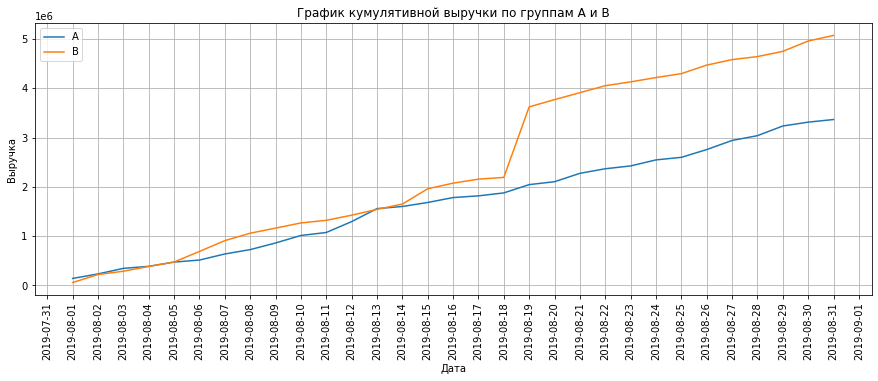

In [18]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Установим размер графика
plt.figure(figsize=(15, 5))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

# Настроим отображение графика
plt.grid()
plt.gca().xaxis.set_major_locator(matplotlib.dates.DayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=90)
plt.title('График кумулятивной выручки по группам А и В')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()
plt.show()

<div style="border:solid orange 3px; padding: 20px"> Выручка почти равномерно увеличивается в течение всего теста для обеих групп, но при этом в группе В отмечается резкий скачок 19 августа, что может означать наличие аномально высоких значений выручки в этот день. На протяжении всего теста, за исключением нескольких дней, кумулятивная выручка группы В превышает кумулятивную выручку группы А.

### График кумулятивного среднего чека по группам

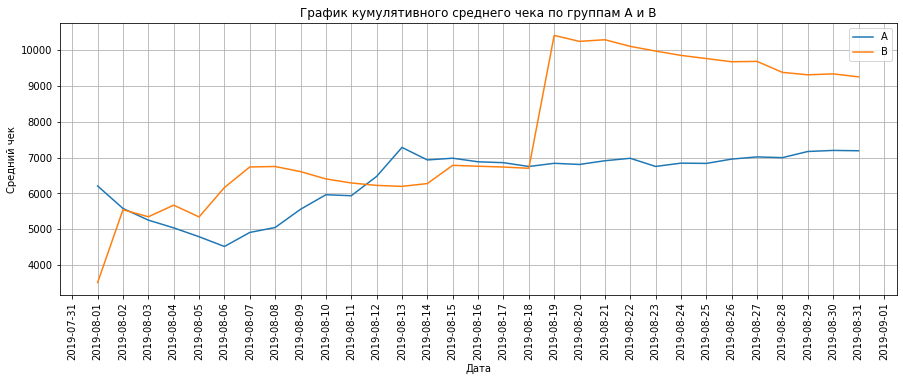

In [19]:
plt.figure(figsize=(15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.grid()
plt.gca().xaxis.set_major_locator(matplotlib.dates.DayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=90)
plt.title('График кумулятивного среднего чека по группам А и В')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()
plt.show()

<div style="border:solid orange 3px; padding: 20px"> На графике среднего чека группы В также наблюдается резкий скачок 19-го августа, в целом на протяжении теста, за исключением отдельных дней, средний чек группы В превышал средний чек группы А, в последние три дня теста чек становится равномерным для обеих групп.

### График относительного изменения кумулятивного среднего чека группы B к группе A

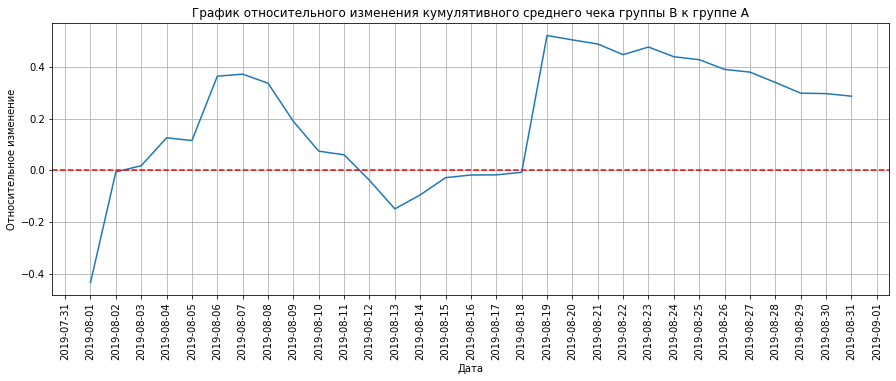

In [20]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = (
    cumulativeRevenueA
    .merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)

# cтроим отношение средних чеков
plt.figure(figsize=(15, 5))
(
    plt.plot(mergedCumulativeRevenue['date'], 
             (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
             /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
)
plt.grid()
plt.gca().xaxis.set_major_locator(matplotlib.dates.DayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=90)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
# добавляем ось X
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

<div style="border:solid orange 3px; padding: 20px"> На графике видны аналогичные тенденции, как на предыдущем графике. По большей части средний чек группы В превышал средний чек группы А, затем отмечается резкий скачок 19 августа и постепенное снижение, последние три дня теста средний чек практически не менялся. Наличие резких изменений среднего чека может свидетельствовать о наличии выбросов, которые могут искажать результаты тестирования.

### График кумулятивного среднего количества заказов на посетителя по группам

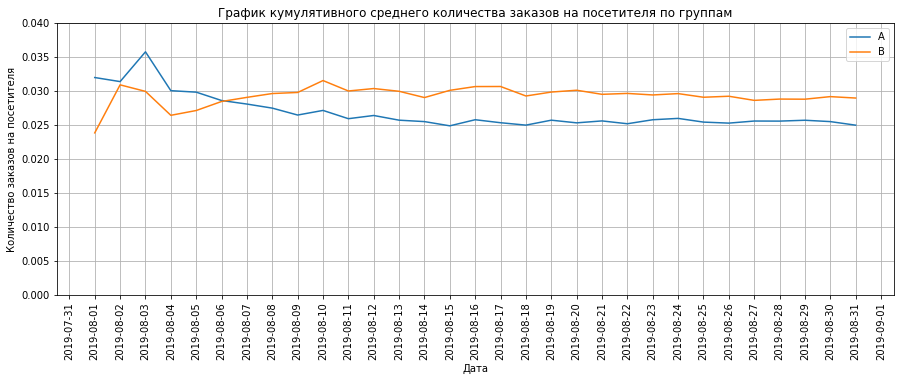

In [21]:
# считаем среднее количество заказов на посетителя, или конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.grid()
plt.gca().xaxis.set_major_locator(matplotlib.dates.DayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=90)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Количество заказов на посетителя')
plt.legend()

# задаем масштаб оси
plt.ylim([0, 0.04])
plt.show()

<div style="border:solid orange 3px; padding: 20px"> Первые 5 дней теста конверсия группы А превышала конверсию группы В, но начиная с 6 августа конверсия группы В обогнала группу А и превышала ее до конца теста. Группа А колебалась около значения 0,025, а группа В - около 0,03.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

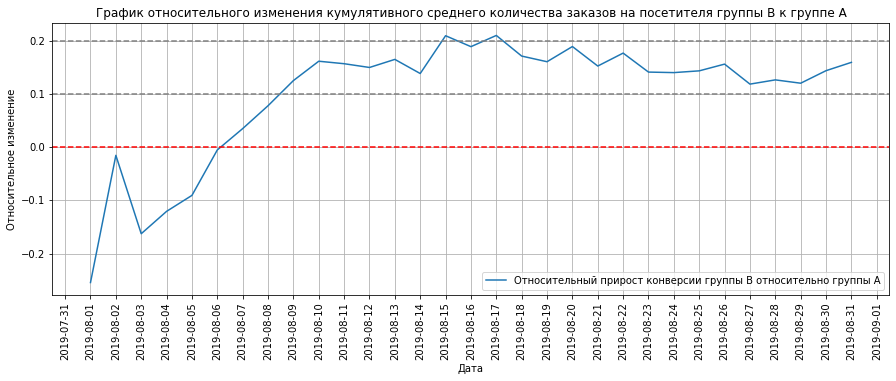

In [22]:
mergedCumulativeConversions = (
    cumulativeDataA[['date','conversion']]
    .merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)
plt.figure(figsize=(15, 5))
plt.plot(
    mergedCumulativeConversions['date'], 
    mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
    label="Относительный прирост конверсии группы B относительно группы A"
)
plt.grid()
plt.gca().xaxis.set_major_locator(matplotlib.dates.DayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=90)
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.legend()

plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.show()

<div style="border:solid orange 3px; padding: 20px"> Начиная с 7 августа конверсия группы В больше конверсии группы А. Большую часть месяца конверсия группы В была на 10-20% выше конверсии группы А.

### Точечный график количества заказов по пользователям

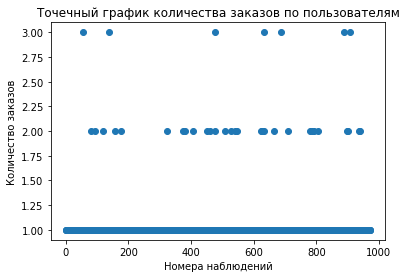

In [23]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Номера наблюдений')
plt.ylabel('Количество заказов')
plt.show()

<div style="border:solid orange 3px; padding: 20px"> Большинство пользователей делают 1-2 заказа, небольшой % - 3 заказа.

### Расчет 95-ого и 99-ого перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей

In [24]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

<div style="border:solid orange 3px; padding: 20px"> Расчет перцентилей подтвердил предыдущие выводы по графику: всего 5% пользователей делают больше одного заказа, из них 1% - больше двух заказов. Отсеем 1% аномальных пользователей, т.е. сделавших более двух заказов.

### Точечный график стоимостей заказов

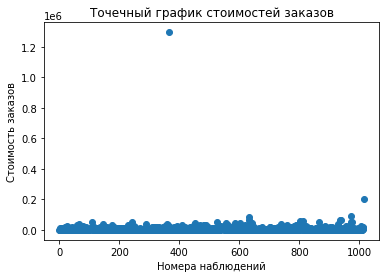

In [25]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Номера наблюдений')
plt.ylabel('Стоимость заказов')
plt.show()

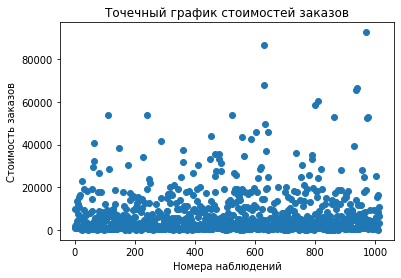

In [26]:
# Построим ещё один график без учета выбросов для наглядности
x_values_ = pd.Series(range(0,len(orders[orders['revenue'] < 200000]['revenue'])))
plt.scatter(x_values_, orders[orders['revenue'] < 200000]['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Номера наблюдений')
plt.ylabel('Стоимость заказов')
plt.show()

In [27]:
# Посмотрим на заказы с наибольшей стоимостью
orders.sort_values(by='revenue', ascending=False).head()

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A


Видим, что в группе В есть заказ стоимостью почти 1,3 млн, в то время как большинство заказов не превышает 60 тысяч.

<div style="border:solid orange 3px; padding: 20px"> Судя по графику есть один заказ, стоимость которого более чем в 10 раз превышает стоимость остальных заказов. Видимо этот заказ и есть причина скачка для группы В на графиках кумулятивной выручки и кумулятивного среднего чека. Большинство заказов не превышает 60 тысяч.

### Расчет 95-ого и 99-ого перцентилей стоимости заказов. Выбор границы для определения аномальных заказов

In [28]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

<div style="border:solid orange 3px; padding: 20px"> Всего 5% заказов имеют стоимость более 26,8 тысячи, из них 1% - более 53,9 тысячи. Отсеем 1% аномальных пользователей, т.е. заказавших более чем на 53,9 тысячи.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Сформулируем гипотезы: 
- H0: различий в среднем количестве заказов между группами А и В нет. 
- H1: различия в среднем количестве заказов между группами А и В есть. 

Здесь и далее критический уровень статистической значимости - 0,05

In [29]:
# количество пользователей группы А в день
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# кумулятивное количество пользователей группы А в день
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# количество пользователей группы B в день
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# кумулятивное количество пользователей группы B в день
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# количество заказов и суммарная выручка группы А в день
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# кумулятивное количество заказов и суммарная выручка группы А в день
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# количество заказов и суммарная выручка группы B в день
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# кумулятивное количество заказов и суммарная выручка группы B в день
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

# Объединяем полученные таблицы в одну
df = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

# Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 
# Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.
sampleA = pd.concat(
    [ordersByUsersA['orders'],
     pd.Series(0, index=np.arange(df['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0
)

sampleB = pd.concat(
    [ordersByUsersB['orders'],
     pd.Series(0, index=np.arange(df['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0
)

# Проверка критерием Манна-Уитни
print("p-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

# Относительный прирост среднего числа заказов группы B
print("Относительный прирост среднего числа заказов группы B: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.011
Относительный прирост среднего числа заказов группы B: 0.160


<div style="border:solid orange 3px; padding: 20px"> Т.к. 0,011 < 0,05, то нулевая гипотеза об отсутствии статистически значимых различий в среднем количестве заказов на посетителя между группами А и В отвергается. Относительный выигрыш группы B по "сырым" данным равен 16,0%.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипотезы.

- H0: различий в среднем чеке между группами А и В нет.
- H1: различия в среднем чеке между группами А и В есть.

In [30]:
# Проверка критерием Манна-Уитни
print(
    'p-value: {0:.3f}'
    .format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])
)

# Относительный прирост среднего чека группы B
print(
    'Относительный прирост среднего чека группы B: {0:.3f}'
    .format(orders[orders['group']=='B']['revenue']
            .mean()/orders[orders['group']=='A']['revenue']
            .mean()-1)
)

p-value: 0.829
Относительный прирост среднего чека группы B: 0.287


<div style="border:solid orange 3px; padding: 20px"> P-value 0.829 значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Наблюдаемое различие в 28,7% между средними чеками групп А и В не является статистически значимым.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Примем за аномальных пользователей тех, кто совершил больше 2 заказов или совершил заказ дороже 53904. Так мы уберём 1% пользователей с наибольшим числом заказов и 1% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — `usersWithManyOrders` и пользователей, совершивших заказы дороже 53904 — `usersWithExpensiveOrders`. Объединим их в таблице `abnormalUsers`.

Узнаем, сколько всего аномальных пользователей атрибутом `shape`.

In [31]:
orders_lim = np.percentile(ordersByUsers['orders'], 99)
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > orders_lim]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > orders_lim]['userId'],
    ],
    axis=0,
)
revenue_lim = np.percentile(orders['revenue'], 99)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_lim]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

abnormalUsers.shape[0]

16

Таким образом, будет отсеяно 16 пользователей с аномальными показателями. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

In [32]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего числа заказов группы B: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.007
Относительный прирост среднего числа заказов группы B: 0.189


<div style="border:solid orange 3px; padding: 20px"> Т.к. 0,007 < 0,05, то нулевая гипотеза об отсутствии статистически значимых различий в среднем количестве заказов на посетителя между группами А и В по "очищенным" данным также отвергается. Относительный выигрыш группы B по "очищенным" данным выше, чем по "сырым", и равен 18,9% (16,0% по "сырым").

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [33]:
print(
    'p-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный прирост среднего чека группы B: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.788
Относительный прирост среднего чека группы B: -0.032


<div style="border:solid orange 3px; padding: 20px"> P-value 0.788 значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Наблюдаемое различие в 3,2% между средними чеками групп А и В не является статистически значимым.

### Решение по результатам теста

Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

<div style="border:solid orange 3px; padding: 20px"> Таким образом:

- Имеются статистически значимые различия по среднему количеству заказов между группами по «сырым», и по данным после фильтрации аномалий. Выигрыш группы В по "очищенным" данным составил 18,9%;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A и нет значительной тенденции к ухудшению.


Исходя из обнаруженных фактов, тест предлагается остановить и зафиксировать победу группы В.